In [379]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('data/data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
# Display the first few rows of the DataFrame
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,Private,209297,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,<=50K
1,32,Private,107417,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,37,United-States,<=50K
2,59,Local-gov,296253,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,>50K
3,44,Federal-gov,102238,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4,27,?,190650,Bachelors,13,Never-married,?,Unmarried,Asian-Pac-Islander,Male,0,0,25,Philippines,<=50K


In [380]:
df.rename(columns={'fnlwgt': 'weight'}, inplace=True)
df.rename(columns={'education.num': 'education.years'}, inplace=True)
df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})
df.head()

C:\Users\veint\AppData\Local\Temp\ipykernel_1936\2492541123.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income'] = df['income'].replace({'<=50K': 0, '>50K': 1})


,age,workclass,weight,education,education.years,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,Private,209297,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,0
1,32,Private,107417,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,37,United-States,0
2,59,Local-gov,296253,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,1
3,44,Federal-gov,102238,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,0
4,27,?,190650,Bachelors,13,Never-married,?,Unmarried,Asian-Pac-Islander,Male,0,0,25,Philippines,0


In [381]:
# Display statistical summary for numerical columns
numerical_summary = df.describe()
print(numerical_summary)

                age        weight  education.years  capital.gain  \
count  29305.000000  2.930500e+04     29305.000000  29305.000000   
mean      38.585873  1.896250e+05        10.086402   1068.362395   
std       13.631880  1.055207e+05         2.571243   7354.283789   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178330e+05         9.000000      0.000000   
50%       37.000000  1.783830e+05        10.000000      0.000000   
75%       48.000000  2.369070e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       capital.loss  hours.per.week        income  
count  29305.000000    29305.000000  29305.000000  
mean      87.359154       40.440676      0.241597  
std      403.544373       12.347421      0.428059  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000  
75%        0.000000    

In [382]:
# List of categorical columns
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Display the distribution of each categorical variable
for column in categorical_columns:
    print(f"Distribution of {column}:")
    print(df[column].value_counts())
    print("\n")

Distribution of workclass:
workclass
Private             20417
Self-emp-not-inc     2304
Local-gov            1890
?                    1641
State-gov            1155
Self-emp-inc         1013
Federal-gov           865
Without-pay            13
Never-worked            7
Name: count, dtype: int64


Distribution of education:
education
HS-grad         9430
Some-college    6583
Bachelors       4834
Masters         1549
Assoc-voc       1248
11th            1060
Assoc-acdm       963
10th             821
7th-8th          570
Prof-school      518
9th              463
12th             388
Doctorate        374
5th-6th          307
1st-4th          153
Preschool         44
Name: count, dtype: int64


Distribution of marital.status:
marital.status
Married-civ-spouse       13483
Never-married             9576
Divorced                  4020
Separated                  926
Widowed                    905
Married-spouse-absent      376
Married-AF-spouse           19
Name: count, dtype: int64


Distribu

In [383]:
df_inter = df[(df.isin(['?']).any(axis=1))]
print(df_inter.count())

age                2145
workclass          2145
weight             2145
education          2145
education.years    2145
marital.status     2145
occupation         2145
relationship       2145
race               2145
sex                2145
capital.gain       2145
capital.loss       2145
hours.per.week     2145
native.country     2145
income             2145
dtype: int64


In [384]:
filtered_rows = df[(df.isin(['?']).any(axis=1)) & (df['weight'] < 0.6e+06)]
print(filtered_rows.count())

age                2134
workclass          2134
weight             2134
education          2134
education.years    2134
marital.status     2134
occupation         2134
relationship       2134
race               2134
sex                2134
capital.gain       2134
capital.loss       2134
hours.per.week     2134
native.country     2134
income             2134
dtype: int64


In [385]:
filtered_rows["weight"]

4        190650
9        263970
19       431861
31       405684
38       195767
          ...  
29239     28929
29262    240857
29289    161290
29301    224361
29302    251659
Name: weight, Length: 2134, dtype: int64

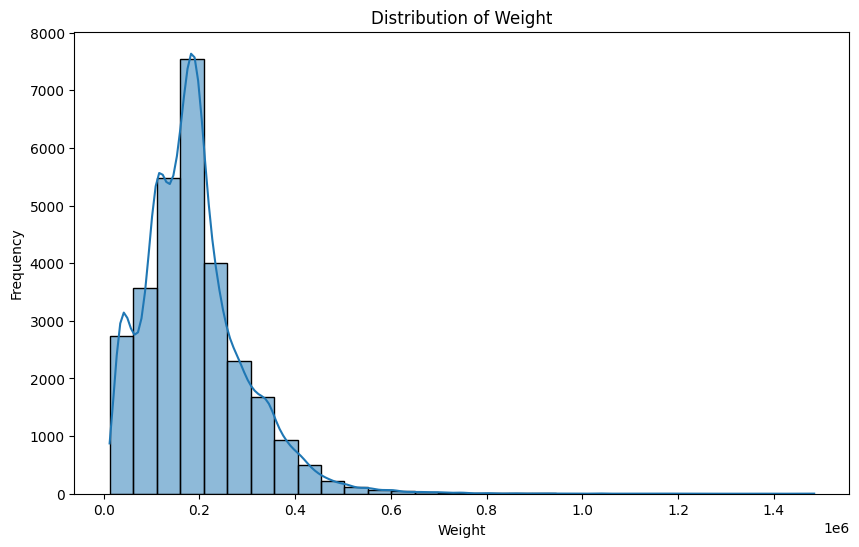

In [386]:
# Create a distribution plot for the variable 'weight'
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

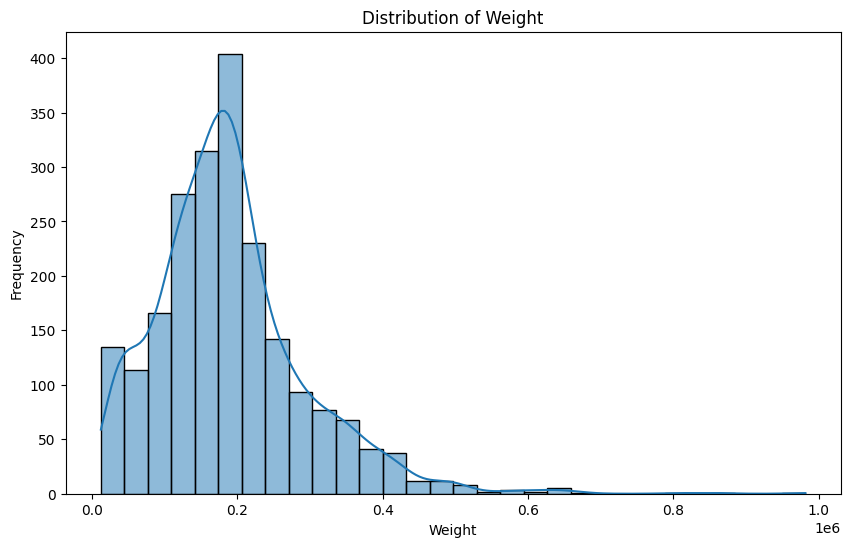

In [387]:
# Create a distribution plot for the variable 'weight'
plt.figure(figsize=(10, 6))
sns.histplot(df_inter['weight'], bins=30, kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [388]:
df_clean = df.copy()
df_clean.drop(filtered_rows.index, inplace=True)
df_clean.reset_index(drop=True, inplace=True)
df_clean.head()

,age,workclass,weight,education,education.years,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,Private,209297,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,0
1,32,Private,107417,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,37,United-States,0
2,59,Local-gov,296253,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,1
3,44,Federal-gov,102238,HS-grad,9,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,0
4,43,Local-gov,163434,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,55,United-States,1


In [389]:
df_inter = df_clean[(df_clean.isin(['?']).any(axis=1))]

# Create a distribution plot for the variable 'weight'
print(df_inter.count())
print(df_inter.head(10))

age                11
workclass          11
weight             11
education          11
education.years    11
marital.status     11
occupation         11
relationship       11
race               11
sex                11
capital.gain       11
capital.loss       11
hours.per.week     11
native.country     11
income             11
dtype: int64
       age         workclass  weight     education  education.years  \
1911    17                 ?  806316          11th                7   
3281    31                 ?  672412          11th                7   
4642    36  Self-emp-not-inc  609935     Bachelors               13   
8487    56                 ?  656036       HS-grad                9   
9832    17                 ?  634226          10th                6   
12003   34           Private  609789       HS-grad                9   
12685   32                 ?  640383     Bachelors               13   
16956   19                 ?  860348  Some-college               10   
17807   32        

# Codificación de variables cualitativas

In [403]:
# List of categorical columns
categorical_columns = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


for x in categorical_columns:
    unique_workclass_values = df_clean[x].unique()

    # Create a dictionary mapping each unique value to a different integer
    workclass_mapping = {value: idx for idx, value in enumerate(unique_workclass_values)}
    workclass_mapping["?"] = -1

    df_clean[x] = df_clean[x].map(workclass_mapping)
    df_clean.head()


In [404]:
# Get unique values in the 'workclass' column
unique_education_values = df_clean['education'].unique()

# Create a dictionary mapping each unique value to a different integer
education_mapping = {value: idx for idx, value in enumerate(unique_education_values)}
education_mapping["Preschool"] = 0
education_mapping["1st-4th"] = 1
education_mapping["5th-6th"] = 2
education_mapping["7th-8th"] = 3
education_mapping["9th"] = 4
education_mapping["10th"] = 5
education_mapping["11th"] = 6
education_mapping["12th"] = 7
education_mapping["HS-grad"] = 8
education_mapping["Prof-school"] = 9
education_mapping["Some-college"] = 10
education_mapping["Assoc-acdm"] = 11
education_mapping["Assoc-voc"] = 12
education_mapping["Bachelors"] = 13
education_mapping["Masters"] = 14
education_mapping["Doctorate"] = 15
education_mapping["?"] = -1

df_clean['education'] = df_clean['education'].map(education_mapping)
df_clean.head()

,age,workclass,weight,education,education.years,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,0,209297,0,9,0,0,0,0,0,0,2001,40,0,0
1,32,0,107417,0,9,0,1,0,1,0,0,0,37,0,0
2,59,1,296253,1,14,1,2,1,1,1,8614,0,60,0,1
3,44,2,102238,0,9,1,3,1,1,0,0,0,40,0,0
4,43,1,163434,2,13,2,4,2,1,0,0,0,55,0,1


# marital.status

In [395]:
colun = categorical_columns[2]

print(f"Distribution of {colun}:")
print(df_clean[colun].value_counts())

Distribution of marital.status:
marital.status
Married-civ-spouse       12660
Never-married             8714
Divorced                  3817
Separated                  844
Widowed                    751
Married-spouse-absent      328
Married-AF-spouse           18
Name: count, dtype: int64


In [400]:
# Get unique values in the 'workclass' column
unique_workclass_values = df_clean['marital.status'].unique()

# Create a dictionary mapping each unique value to a different integer
workclass_mapping = {value: idx for idx, value in enumerate(unique_workclass_values)}
workclass_mapping["?"] = -1

df_clean['marital.status'] = df_clean['marital.status'].map(workclass_mapping)
df_clean.head()

,age,workclass,weight,education,education.years,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,0,209297,8,9,0,Machine-op-inspct,Not-in-family,Black,Male,0,2001,40,United-States,0
1,32,0,107417,8,9,0,Other-service,Not-in-family,White,Male,0,0,37,United-States,0
2,59,1,296253,14,14,1,Prof-specialty,Unmarried,White,Female,8614,0,60,United-States,1
3,44,2,102238,8,9,1,Craft-repair,Unmarried,White,Male,0,0,40,United-States,0
4,43,1,163434,13,13,2,Protective-serv,Husband,White,Male,0,0,55,United-States,1


In [ ]:
colun = categorical_columns[2]

print(f"Distribution of {colun}:")
print(df_clean[colun].value_counts())

In [397]:
numerical_columns_df_clean = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns_df_clean.remove('education')
numerical_columns_df_clean.remove('workclass')
print(numerical_columns_df_clean)


['age', 'weight', 'education.years', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']


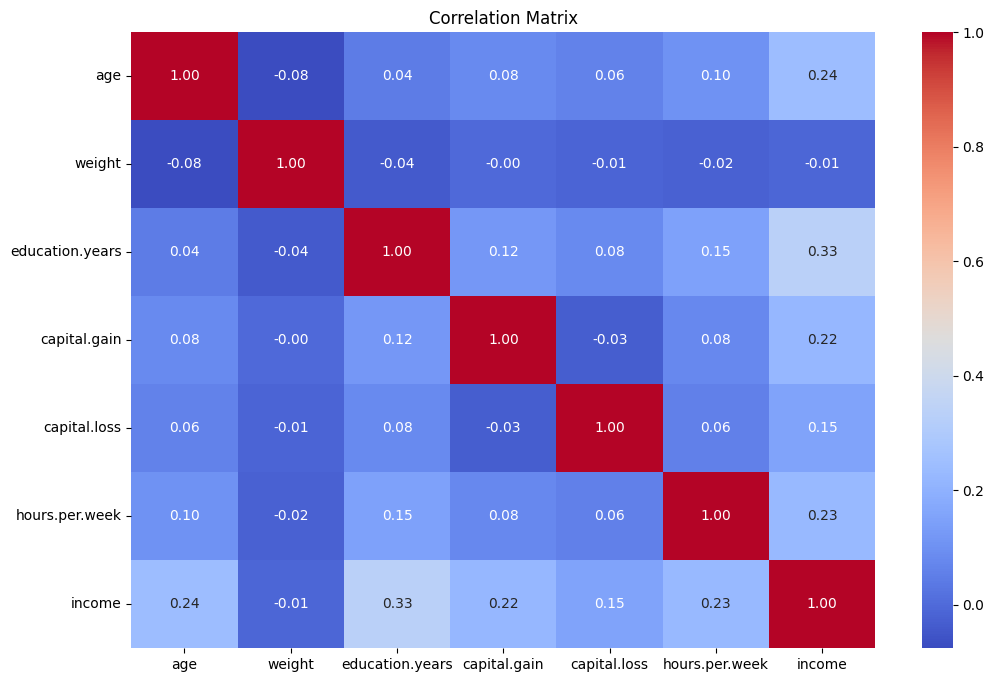

In [ ]:
# Filter the DataFrame to include only numerical columns
numerical_df = df_clean[numerical_columns_df_clean]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

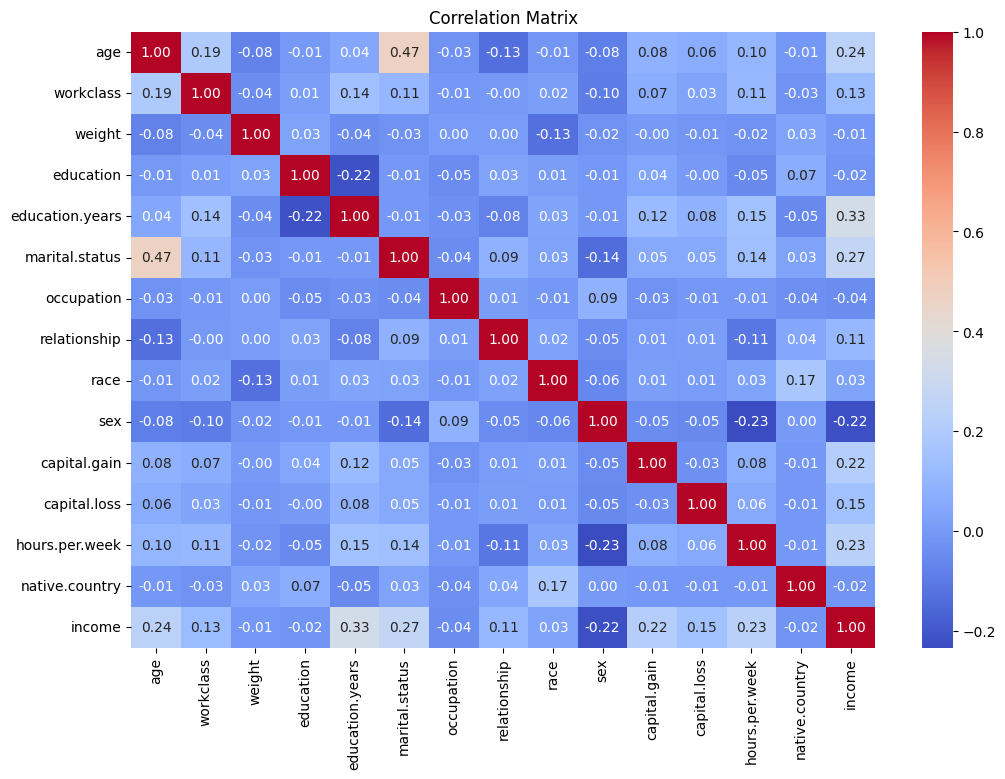

In [405]:
# Compute the correlation matrix
correlation_matrix = df_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()